In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

In [2]:
from matplotlib import pyplot as plt

# Importing the dataset and loading it into a pandas dataframe.

In [4]:
sample_data = pd.read_csv('insurance.csv')

In [5]:
sample_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
type(sample_data)

pandas.core.frame.DataFrame

# Checking the data types.

In [27]:
sample_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Summary statistics of the numerical columns.

In [26]:
sample_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Checking missing values

In [23]:
sample_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
M = sample_data[sample_data.sex == 'male']

In [9]:
M

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1327,51,male,30.030,1,no,southeast,9377.90470
1329,52,male,38.600,2,no,southwest,10325.20600


In [10]:
F = sample_data[sample_data.sex == 'female']

In [11]:
F

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


# Distribution of numerical variables using histograms 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

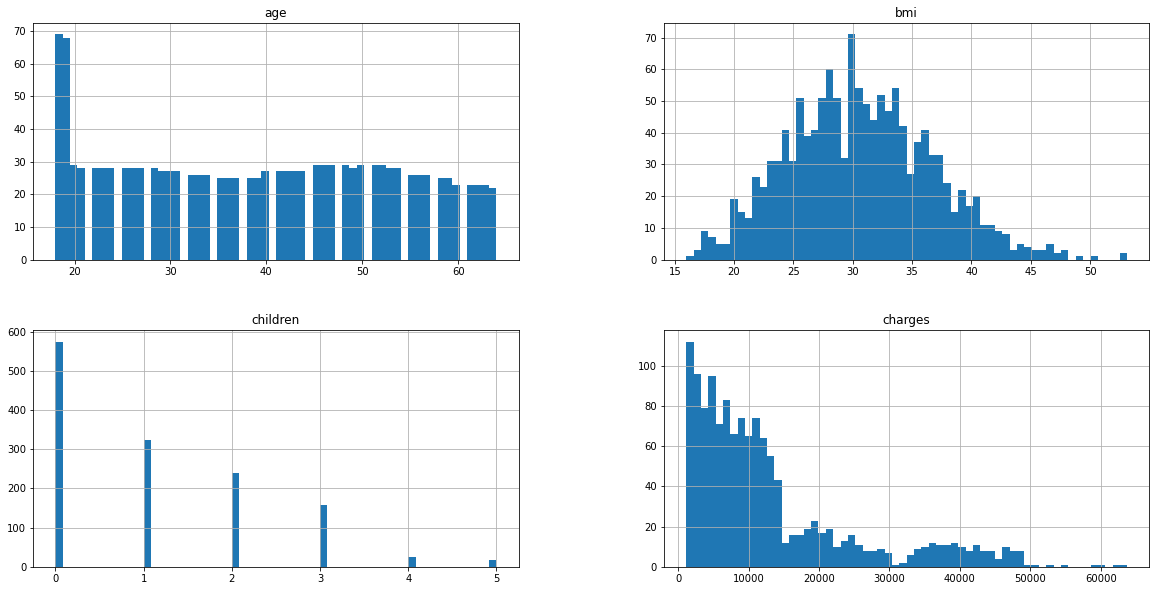

In [31]:
sample_data.hist(bins = 60, figsize = (20,10))

# Distribution of categorical variables (sex, smoker, region) using bar plots.

In [45]:
pd.DataFrame(sample_data['sex'].value_counts())

,sex
male,676
female,662


<AxesSubplot:>

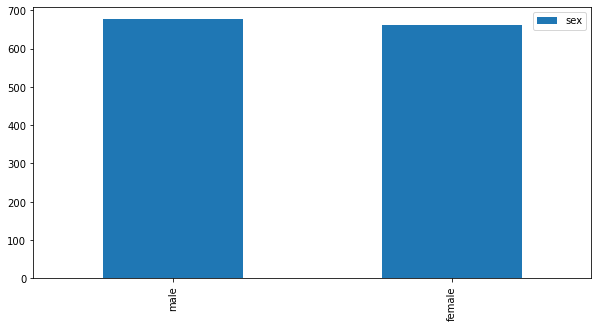

In [46]:
pd.DataFrame(sample_data['sex'].value_counts()).plot(kind='bar', figsize=(10,5))

In [39]:
pd.DataFrame(sample_data['region'].value_counts())

,region
southeast,364
southwest,325
northwest,325
northeast,324


<AxesSubplot:>

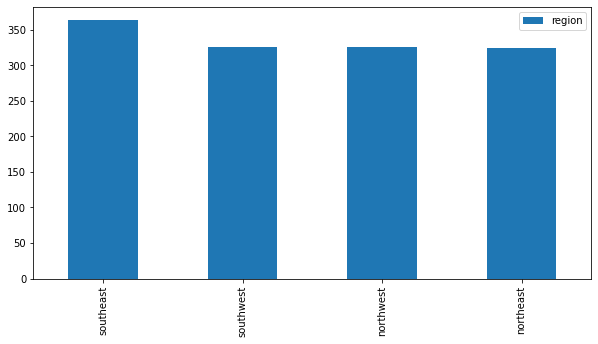

In [42]:
pd.DataFrame(sample_data['region'].value_counts()).plot(kind='bar', figsize=(10,5))

In [56]:
pd.DataFrame(sample_data['smoker'].value_counts())

,smoker
no,1064
yes,274


<AxesSubplot:>

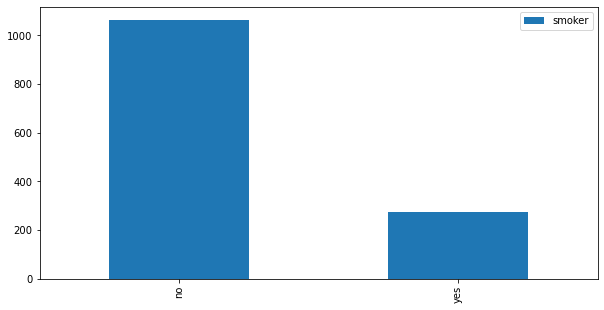

In [57]:
pd.DataFrame(sample_data['smoker'].value_counts()).plot(kind='bar', figsize=(10,5))

# Filtering data

In [52]:
sample_data.loc[(sample_data['sex'] == 'male') & (sample_data['region'] == 'southwest') & (sample_data['smoker'] == 'yes') ]

,age,sex,bmi,children,smoker,region,charges
19,30,male,35.3,0,yes,southwest,36837.46700
29,31,male,36.3,2,yes,southwest,38711.00000
30,22,male,35.6,0,yes,southwest,35585.57600
34,28,male,36.4,1,yes,southwest,51194.55914
39,60,male,39.9,0,yes,southwest,48173.36100
52,48,male,28.0,1,yes,southwest,23568.27200
99,38,male,19.3,0,yes,southwest,15820.69900
223,19,male,34.8,0,yes,southwest,34779.61500
271,50,male,34.2,2,yes,southwest,42856.83800
296,19,male,27.7,0,yes,southwest,16297.84600


In [54]:
sample_data.loc[(sample_data['sex'] == 'female') & (sample_data['region'] == 'southwest') & (sample_data['smoker'] == 'no') ]

,age,sex,bmi,children,smoker,region,charges
21,30,female,32.4,1,no,southwest,4149.73600
32,19,female,28.6,5,no,southwest,4687.79700
65,19,female,28.9,0,no,southwest,1743.21400
66,61,female,39.1,2,no,southwest,14235.07200
72,53,female,28.1,3,no,southwest,11741.72600
...,...,...,...,...,...,...,...
1302,25,female,20.8,1,no,southwest,3208.78700
1316,19,female,20.6,0,no,southwest,1731.67700
1331,23,female,33.4,0,no,southwest,10795.93733
1332,52,female,44.7,3,no,southwest,11411.68500


# Linear Regression

In [60]:
# split the data into target (y) and predictors (X)
y = sample_data['charges']
X = sample_data.drop('charges', axis=1)

In [62]:
# convert categorical variables to one-hot encoded variables
X = pd.get_dummies(X)

In [63]:
# fit a linear regression model
reg = LinearRegression().fit(X, y)

In [64]:
# make predictions on the test data
y_pred = reg.predict(X)

In [70]:
df= pd.DataFrame(data={"actual values": y, "predicted values": y_pred})
df
df['differences'] = df['predicted values'] - df['actual values']
df

,actual values,predicted values,differences
0,16884.92400,25293.713028,8408.789028
1,1725.55230,3448.602834,1723.050534
2,4449.46200,6706.988491,2257.526491
3,21984.47061,3754.830163,-18229.640447
4,3866.85520,5592.493386,1725.638186
...,...,...,...
1333,10600.54830,12351.323686,1750.775386
1334,2205.98080,3511.930809,1305.950009
1335,1629.83350,4149.132486,2519.298986
1336,2007.94500,1246.584939,-761.360061


In [65]:
# calculate evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

In [66]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 4170.886894163591
MSE: 36501893.00741544
RMSE: 6041.6796511744515
